In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, QuantileTransformer, PowerTransformer, Normalizer, OneHotEncoder
from sklearn.pipeline import make_pipeline
from random import randint
import random
import pickle
%matplotlib inline

In [ ]:
#data = datasets.load_iris()
#print(data.target_names)

In [2]:
np.random.seed(42)
random.seed(42)

In [ ]:
#X = data.data
#y = data.target



In [3]:
pre_processing_names = [
    "Standard Scaler",
    "MinMax Scaler",
    "MaxAbs Scaler",
    "Power Transformer",
    "Normalizer"            
]

pre_processing = [
    StandardScaler(), 
    MinMaxScaler(), 
    MaxAbsScaler(), 
    PowerTransformer(), 
    Normalizer()
]

classifer_names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]

In [4]:
def plot_results(res):
  plt.figure(figsize = (15,15))
  plt.imshow(res, aspect='auto', cmap='bone', vmin=0, vmax=1)

  for (i, j), z in np.ndenumerate(res):
      plt.text(j, i, '{:.3f}'.format(z), ha='center', va='center', fontsize='xx-large')

  plt.yticks(np.arange(len(classifer_names)), classifer_names, fontsize=16)
  plt.xticks(np.arange(len(pre_processing_names)), pre_processing_names, fontsize=16)
  plt.xlabel("Preprocessing", fontsize=30, labelpad=30)
  plt.ylabel("Classifier", fontsize=30, labelpad=30)
  plt.title("Results for randomly generated dataset", fontsize=30, pad=50)
  plt.show()

In [5]:
def create_data(samples, features, informative, redundant):
  X, y = datasets.make_classification(n_samples=samples, n_features=features, n_informative=informative, n_redundant=redundant)
  return X, y

In [6]:
def train_models(data):

  #Create 
  X, y = data
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

  res = [[0] * len(pre_processing) for i in range(len(classifiers))]

  

  for c in range(len(classifiers)):
    for p in range(len(pre_processing)):
      pipe = make_pipeline(pre_processing[p], classifiers[c])
      pipe.fit(X_train, y_train)
      score = pipe.score(X_test, y_test)
      res[c][p] = score

  #plot_results(res)
  #print(res)
  return res

In [7]:
def generate_train_data(iters):

  X, y = [], []

  for i in range(iters):
    samples, features = randint(100, 1000), randint(20, 100)
    informative = randint(2, features)
    redundant = features - informative
    print(samples, features, informative, redundant)
    data = create_data(samples, features, informative, redundant)

    res = train_models(data)

    for c in range(len(res)):
      for p in range(len(res[c])):
        temp_x = []
        # Add sample/feature information
        temp_x.extend([samples, features, informative, redundant])
        # Add classifier/preprocessing information
        temp_x.extend([classifer_names[c], pre_processing_names[p]])
        # Add accuracy to label
        y.append(res[c][p])
        # Add datapoint to datapoints
        X.append(temp_x)

    #plot_results(res)

  return X, y

In [8]:
def train_predictor(data):
  X, y = data

  X_scalar = StandardScaler().fit_transform([x[:4] for x in X]).tolist()
  X_categorical_classifier = OneHotEncoder(sparse=False).fit_transform([[x[4]] for x in X]).tolist()
  X_categorical_preprocessing = OneHotEncoder(sparse=False).fit_transform([[x[5]] for x in X]).tolist()

  X = []


  for i, j, k in zip(X_scalar, X_categorical_classifier, X_categorical_preprocessing):
    temp = []
    temp.extend(i + j + k)
    X.append(temp)


  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
  model = MLPRegressor(random_state=42)
  model.fit(X_train, y_train)
  score = model.score(X_test, y_test)

  print(score)

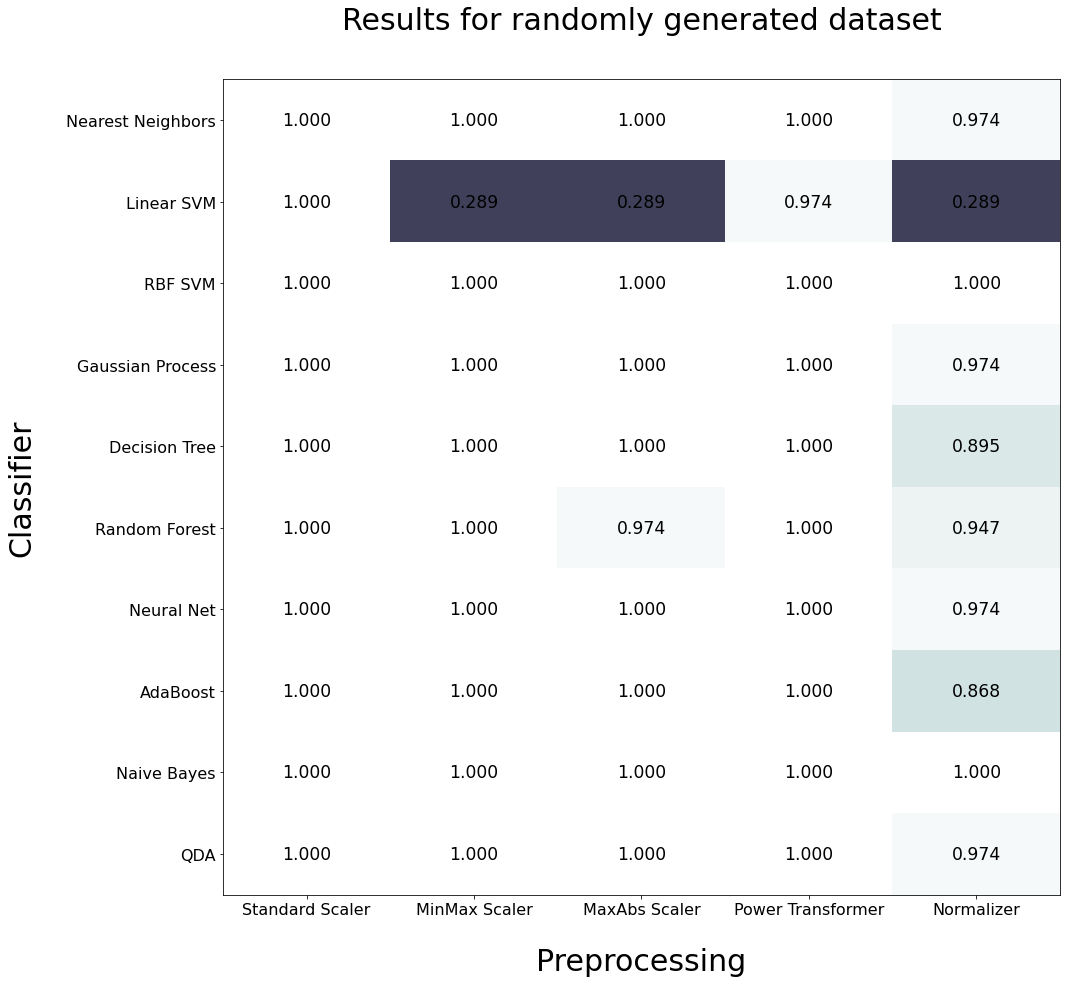

[[1.0, 1.0, 1.0, 1.0, 0.9736842105263158],
 [1.0,
  0.2894736842105263,
  0.2894736842105263,
  0.9736842105263158,
  0.2894736842105263],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 0.9736842105263158],
 [1.0, 1.0, 1.0, 1.0, 0.8947368421052632],
 [1.0, 1.0, 0.9736842105263158, 1.0, 0.9473684210526315],
 [1.0, 1.0, 1.0, 1.0, 0.9736842105263158],
 [1.0, 1.0, 1.0, 1.0, 0.868421052631579],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 0.9736842105263158]]

In [ ]:
data = datasets.load_iris()
data = (data.data, data.target)
train_models(data)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
for i in range(1, 11):
  data = generate_train_data(100)
  pickle.dump(data, open("train_data/train_data_" + str(i) + ".pickle", "wb" ))
  #train_predictor(data)

In [9]:
def combine_train_data(end=6):
    X, y = [], []

    for i in range(1, end):
        data = pickle.load(open("train_data/train_data_" + str(i) + ".pickle", "rb"))
        X.extend(data[0])
        y.extend(data[1])
        print(len(X), len(y))
    return X, y

In [17]:
def combine_train_data_single(i):
    data = pickle.load(open("train_data/train_data_" + str(i) + ".pickle", "rb"))
    print(len(data[0]), len(data[1]))
    return data

In [11]:
data = combine_train_data()

5000 5000
10000 10000
15000 15000
20000 20000
25000 25000


In [12]:
train_predictor(data)

0.7254882290520492


In [ ]:
res_cumulative = []
x = [5000 * i for i in range(1, 6)]

for i in range(2, 7):
  data = combine_train_data(i)
  score = train_predictor(data)
  res_cumulative.append(score)

plt.scatter(x, res_cumulative)
plt.xlabel("Cumulative Generated Training Data")
plt.ylabel("R2 Score")
plt.title("Predictor Performance")
plt.show()

In [ ]:
res_single = []
x = [5000 * i for i in range(1, 6)]

for i in range(1, 6):
  data = combine_train_data_single(i)
  score = train_predictor(data)
  res_single.append(score)

plt.scatter(x, res_single)
plt.xlabel("Generated Training Data")
plt.ylabel("R2 Score")
plt.title("Predictor Performance")
plt.show()